In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Funciones
def grados_a_mm(valor):
    return valor*5.25

def mm_a_grados(valor):
    return(valor/5.25)

Importo los archivos de las pruebas realizadas

In [5]:
P1 = pd.read_csv('PruebaDeDetección_Sujeto1_Prueba1.csv',delimiter=';')
P2 = pd.read_csv('PruebaDeDetección_Sujeto1_Prueba2.csv',delimiter=';')
P3 = pd.read_csv('PruebaDeDetección_Sujeto1_Prueba3.csv',delimiter=';')
P4 = pd.read_csv('PruebaDeDetección_Sujeto1_Prueba4.csv',delimiter=';')

Separo los estímulos que no fueron detectados en cada prueba(coordenadas x e y)

In [20]:
Coordenadas_x, Coordenadas_y = [],[]
Fijacion_x,Fijacion_y = [],[]

In [30]:
for i in range(len(P1)):
    if P1['Validez'][i]==1 and P1['Resultado'][i]==0:
        Coordenadas_x.append(float(format(P1['Estimulo X'][i],'.2f')))
        Coordenadas_y.append(float(format(P1['Estimulo Y'][i],'.2f')))
        Fijacion_x.append(float(format(P1['Fijacion X'][i],'.2f')))
        Fijacion_y.append(float(format(P1['Fijacion Y'][i],'.2f')))

for i in range(len(P2)):
    if P2['Validez'][i]==1 and P2['Resultado'][i]==0:
        Coordenadas_x.append(float(format(P2['Estimulo X'][i],'.2f')))
        Coordenadas_y.append(float(format(P2['Estimulo Y'][i],'.2f')))
        Fijacion_x.append(float(format(P2['Fijacion X'][i],'.2f')))
        Fijacion_y.append(float(format(P2['Fijacion Y'][i],'.2f')))
        
for i in range(len(P3)):
    if P3['Validez'][i]==1 and P3['Resultado'][i]==0:
        Coordenadas_x.append(float(format(P3['Estimulo X'][i],'.2f')))
        Coordenadas_y.append(float(format(P3['Estimulo Y'][i],'.2f')))
        Fijacion_x.append(float(format(P3['Fijacion X'][i],'.2f')))
        Fijacion_y.append(float(format(P3['Fijacion Y'][i],'.2f')))

for i in range(len(P4)):
    if P4['Validez'][i]==1 and P4['Resultado'][i]==0:
        Coordenadas_x.append(float(format(P4['Estimulo X'][i],'.2f')))
        Coordenadas_y.append(float(format(P4['Estimulo Y'][i],'.2f')))
        Fijacion_x.append(float(format(P4['Fijacion X'][i],'.2f')))
        Fijacion_y.append(float(format(P4['Fijacion Y'][i],'.2f')))

Grafico histogramas en x e y (tanto en mílimetros como en grados) y un mapa de calor para evaluar la frecuencia de los estímulos no detectados

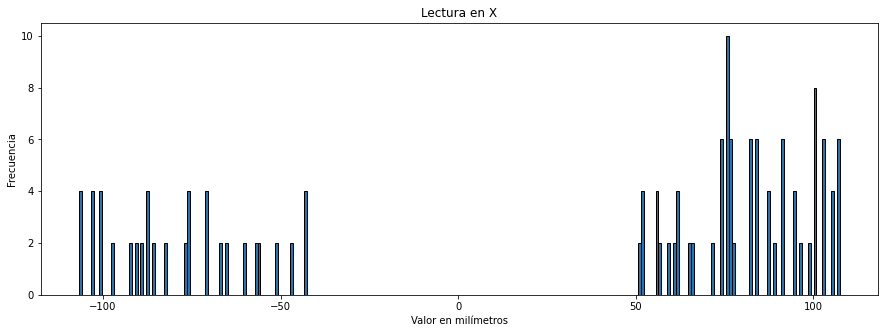

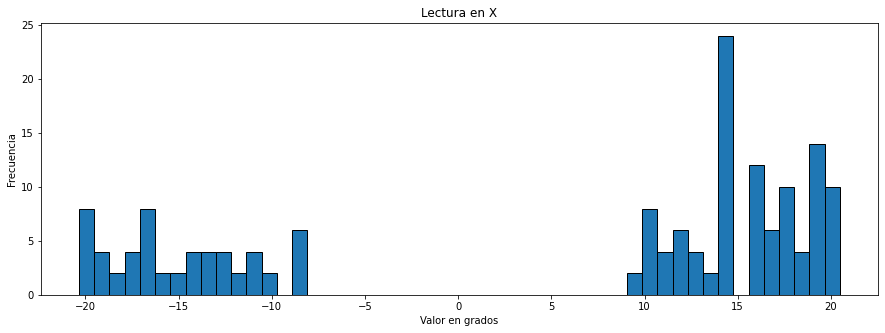

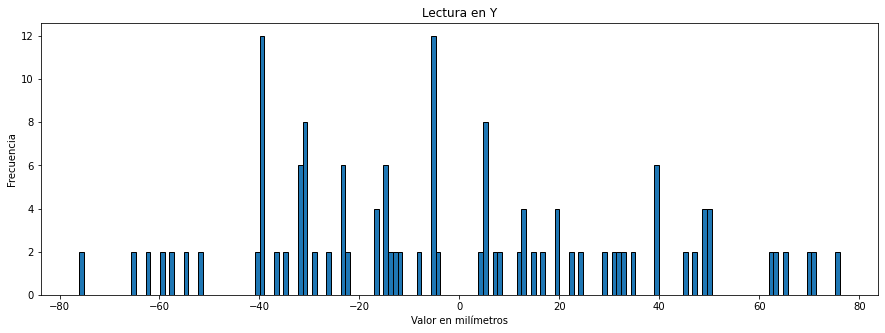

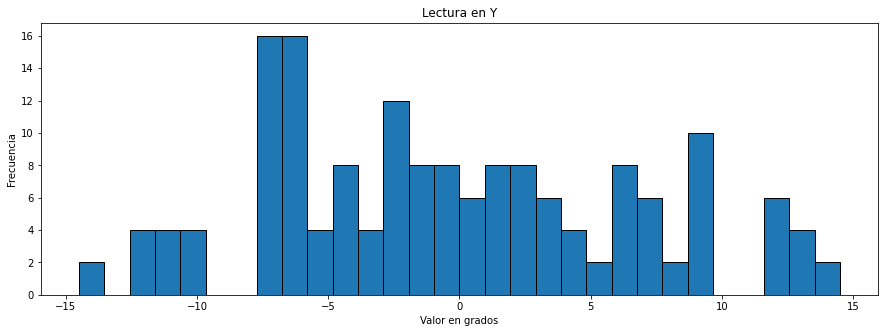

In [31]:
# Histogramas de X
plt.figure(figsize=(15,5))
plt.hist(Coordenadas_x, bins=260, edgecolor='black')
plt.title('Lectura en X');plt.xlabel('Valor en milímetros');plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(mm_a_grados(np.array(Coordenadas_x)), bins=50, edgecolor='black')
plt.title('Lectura en X');plt.xlabel('Valor en grados');plt.ylabel('Frecuencia')
plt.show()


# Histogramas de Y
plt.figure(figsize=(15,5))
plt.hist(Coordenadas_y, bins=160, edgecolor='black')
plt.title('Lectura en Y');plt.xlabel('Valor en milímetros');plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(mm_a_grados(np.array(Coordenadas_y)), bins=30, edgecolor='black')
plt.title('Lectura en Y');plt.xlabel('Valor en grados');plt.ylabel('Frecuencia')
plt.show()


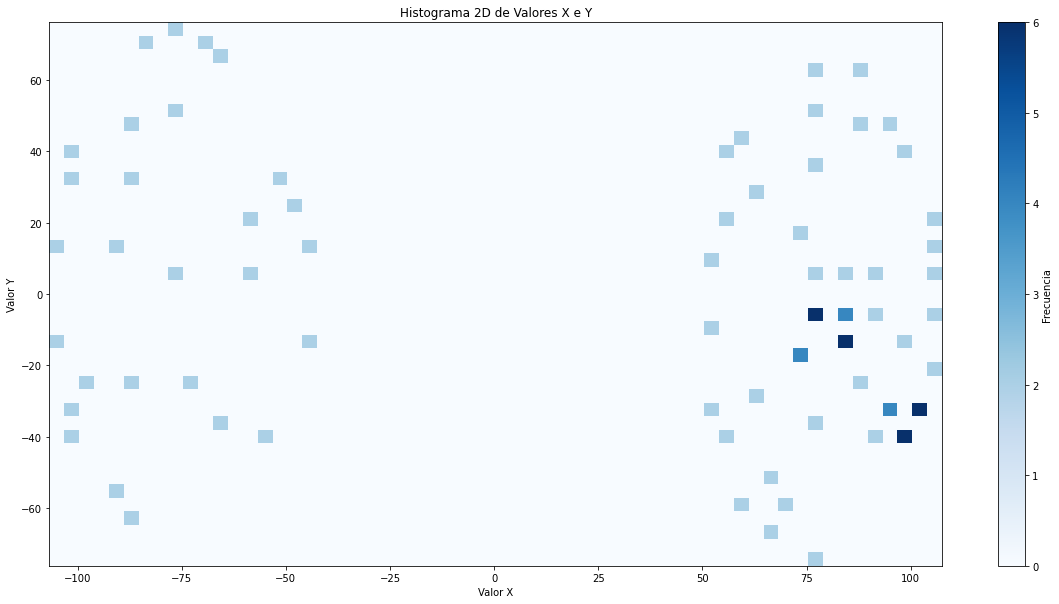

In [32]:
# Crear el histograma 2D
plt.figure(figsize=(20,10))
plt.hist2d(Coordenadas_x, Coordenadas_y, bins=[60, 40], cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Histograma 2D de Valores X e Y');plt.xlabel('Valor X');plt.ylabel('Valor Y')
plt.show()

## Distancias entre el punto de fijación y el estímulo
Obtengo los histogramas en milímetros y grados pero esta vez tengo en cuenta la distancia real entre el punto de fijación y el estímulo

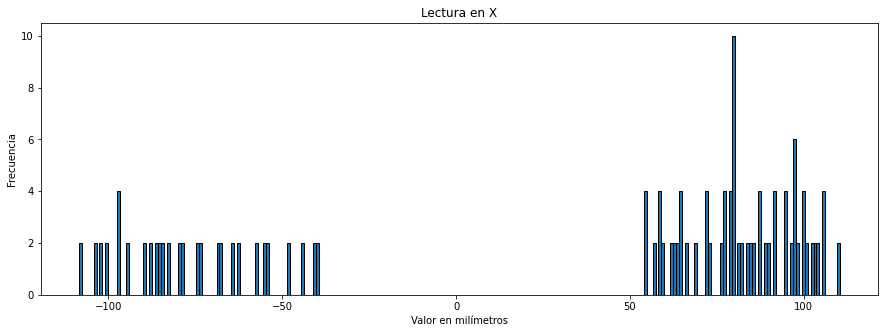

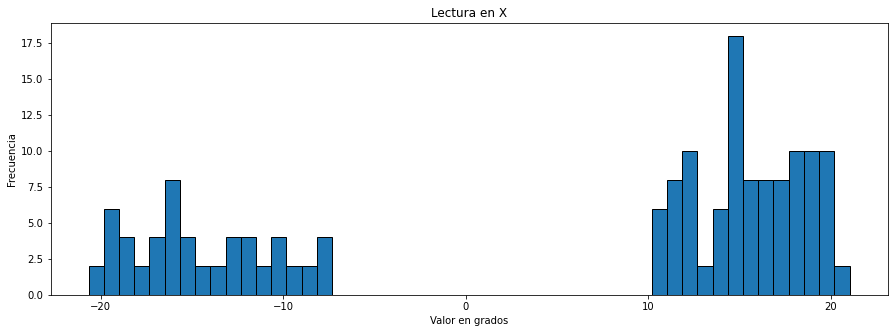

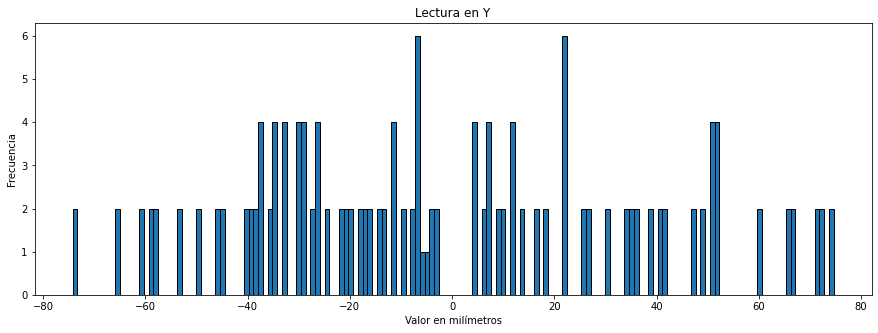

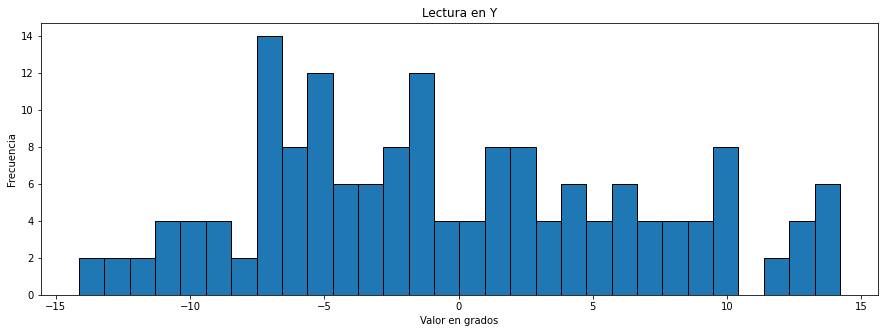

In [33]:
# Histogramas de X
plt.figure(figsize=(15,5))
plt.hist(np.array(Coordenadas_x)-np.array(Fijacion_x), bins=260, edgecolor='black')
plt.title('Lectura en X');plt.xlabel('Valor en milímetros');plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(mm_a_grados(np.array(np.array(Coordenadas_x)-np.array(Fijacion_x))), bins=50, edgecolor='black')
plt.title('Lectura en X');plt.xlabel('Valor en grados');plt.ylabel('Frecuencia')
plt.show()


# Histogramas de Y
plt.figure(figsize=(15,5))
plt.hist(np.array(Coordenadas_y)-np.array(Fijacion_y), bins=160, edgecolor='black')
plt.title('Lectura en Y');plt.xlabel('Valor en milímetros');plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(mm_a_grados(np.array(np.array(Coordenadas_y)-np.array(Fijacion_y))), bins=30, edgecolor='black')
plt.title('Lectura en Y');plt.xlabel('Valor en grados');plt.ylabel('Frecuencia')
plt.show()


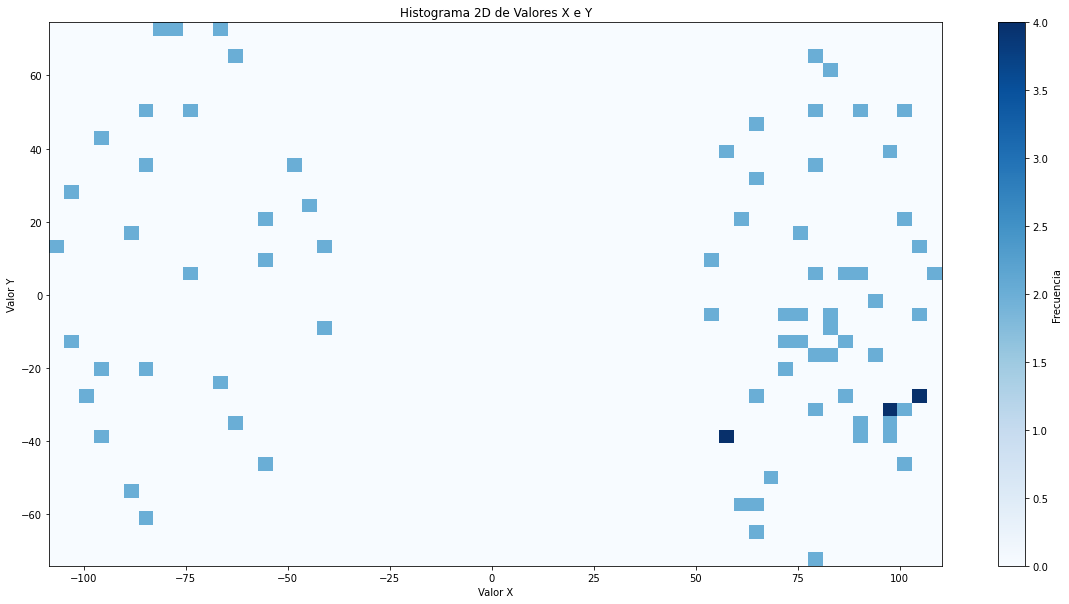

In [34]:
# Crear el histograma 2D
plt.figure(figsize=(20,10))
plt.hist2d(np.array(Coordenadas_x)-np.array(Fijacion_x), np.array(Coordenadas_y)-np.array(Fijacion_y), bins=[60, 40], cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Histograma 2D de Valores X e Y');plt.xlabel('Valor X');plt.ylabel('Valor Y')
plt.show()

## Calibración
Obtengo los valores medios y desviación estándar de las rectas de calibración en X e Y

In [15]:
Calibracion = pd.read_csv('Calibracion_Sujeto1.csv',delimiter=';')

In [16]:
valores_x,valores_y = [],[]
for i in range(len(Calibracion['Lectura X'])):
    if Calibracion['Lectura X'][i] >0:
        valores_x.append(float(format((abs(Calibracion['Lectura X'][i]-60)), '.2f')))
    else:
        valores_x.append(float(format((abs(Calibracion['Lectura X'][i]+60)), '.2f')))

        
for i in range(len(Calibracion['Lectura Y'])):
    if Calibracion['Lectura Y'][i] >0:
        valores_y.append(float(format((abs(Calibracion['Lectura Y'][i]-60)), '.2f')))
    else:
        valores_y.append(float(format((abs(Calibracion['Lectura Y'][i]+60)), '.2f')))


In [17]:
# Calcular el valor medio y la desviación estándar de X
mean_value_x = np.mean(valores_x)
std_dev_x = np.std(valores_x)


# Calcular el valor medio y la desviación estándar de Y
mean_value_y = np.mean(valores_y)
std_dev_y = np.std(valores_y)

Valor Medio en X: 8.20365
Desviación Estandar en X: 5.13010069857308


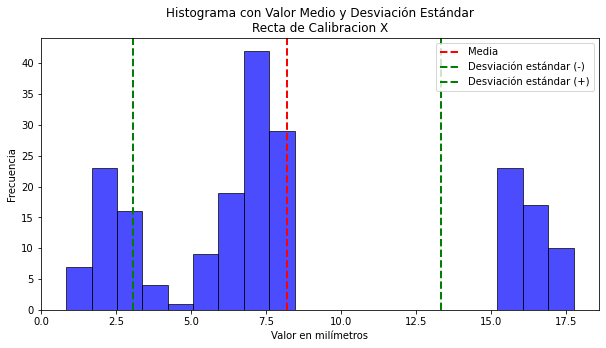

In [18]:
print('Valor Medio en X:',mean_value_x)
print('Desviación Estandar en X:', std_dev_x)
# Crear el histograma
plt.figure(figsize=(10,5))
plt.hist(valores_x, bins=20, edgecolor='black', alpha=0.7, color='blue')

# Añadir líneas verticales para el valor medio y la desviación estándar
plt.axvline(mean_value_x, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mean_value_x - std_dev_x, color='green', linestyle='dashed', linewidth=2, label='Desviación estándar (-)')
plt.axvline(mean_value_x + std_dev_x, color='green', linestyle='dashed', linewidth=2, label='Desviación estándar (+)')

# Añadir títulos y etiquetas
plt.title('Histograma con Valor Medio y Desviación Estándar\nRecta de Calibracion X')
plt.xlabel('Valor en milímetros')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

Valor Medio en Y: 7.690050000000001
Desviación Estandar en Y: 4.00977349703197


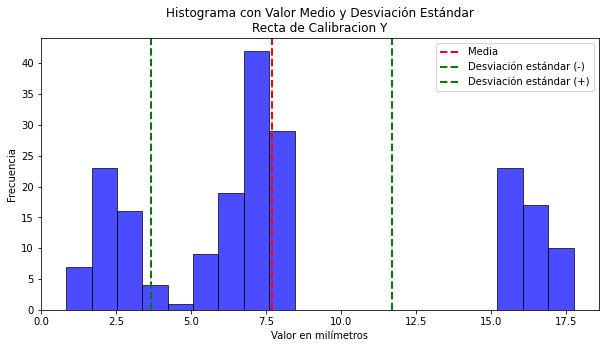

In [19]:
print('Valor Medio en Y:',mean_value_y)
print('Desviación Estandar en Y:', std_dev_y)
# Crear el histograma
plt.figure(figsize=(10,5))
plt.hist(valores_x, bins=20, edgecolor='black', alpha=0.7, color='blue')

# Añadir líneas verticales para el valor medio y la desviación estándar
plt.axvline(mean_value_y, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mean_value_y - std_dev_y, color='green', linestyle='dashed', linewidth=2, label='Desviación estándar (-)')
plt.axvline(mean_value_y + std_dev_y, color='green', linestyle='dashed', linewidth=2, label='Desviación estándar (+)')

# Añadir títulos y etiquetas
plt.title('Histograma con Valor Medio y Desviación Estándar\nRecta de Calibracion Y')
plt.xlabel('Valor en milímetros')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()